Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/MachineLearning SummerSchool/data/kmeans


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0, 0.5, 'x2')

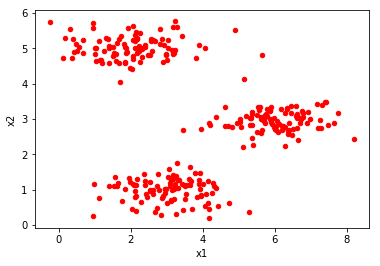

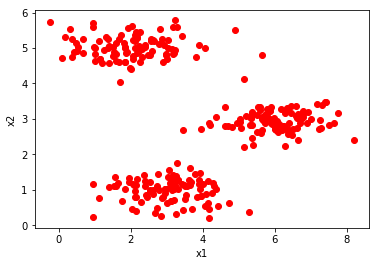

In [2]:
from google.colab import drive
drive. mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/MachineLearning SummerSchool/data/kmeans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

name_file ='./data_kmeans.txt'

columns = ['x1','x2']
data_in = pd.read_csv(name_file, names=columns, sep=' ')

data_in.plot(kind='scatter',x='x1',y='x2',colors='red')

x1 = np.asarray(data_in['x1'])
x2 = np.asarray(data_in['x2'])

plt.figure(5)
plt.plot(x1,x2,'ro')
plt.xlabel('x1')
plt.ylabel('x2')



Define functions

In [0]:
def get_y_hat(x, k):
  # x = input data , k = init clusters
  init_array = np.zeros([len(x),len(k)])
  y_hat = np.zeros([len(x),1])
  
  for i in range(0,len(x)):
    for n in range(0,len(k)):
      l = np.linalg.norm(x[i]-k[n])**2
      init_array[i,n] = l
    y_hat[i] = np.argmin(init_array[i])
  return y_hat  

def update_cent(k,x,y_hat):
  for j in range(0,len(k)):
    for n in range(0,len(x[0])):
      sum_n = 0
      count = 0
      for i in range(0,len(x)):
        if y_hat[i] == j:
          sum_n += x[i,n]
          count += 1       
      if count == 0 :
        k[j] = 10*np.random.rand(1,2)
      else :  
        k[j,n] = sum_n/count
  return k      
  
def show_graph(x1,x2,k):
  plt.plot(x1,x2,'ro')
  plt.plot(k[0,0],k[0,1],'bo')
  plt.plot(k[1,0],k[1,1],'go')
  plt.plot(k[2,0],k[2,1],'yo')
  plt.show()
  return

def make_y_color(x1,x2,k,y):
  plt.plot(x1.reshape(-1,1)[y==0],x2.reshape(-1,1)[y==0],'bo')
  plt.plot(x1.reshape(-1,1)[y==1],x2.reshape(-1,1)[y==1],'go')
  plt.plot(x1.reshape(-1,1)[y==2],x2.reshape(-1,1)[y==2],'yo')
  plt.plot(k[0,0],k[0,1],'ro')
  plt.plot(k[1,0],k[1,1],'ro')
  plt.plot(k[2,0],k[2,1],'ro')
  plt.show()
  return

  

Initializing Part

[[5.48813504 7.15189366]
 [6.02763376 5.44883183]
 [4.23654799 6.45894113]]


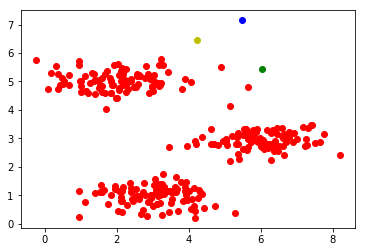

In [42]:
import copy

x = np.hstack([x1.reshape(-1,1),x2.reshape(-1,1)])
np.random.seed(0)
k = 10*np.random.rand(3,2)
print(k)
k_present = copy.deepcopy(k)
k_prev = np.zeros([len(k),len(k[0])])

show_graph(x1,x2,k)

Main loop

k_prev [[5.48813504 7.15189366]
 [6.02763376 5.44883183]
 [4.23654799 6.45894113]]
k_present [[9.63662761 3.83441519]
 [4.85445611 2.11629483]
 [1.92925575 4.29331133]]
k_prev [[5.48813504 7.15189366]
 [6.02763376 5.44883183]
 [4.23654799 6.45894113]]
k_prev [[9.63662761 3.83441519]
 [4.85445611 2.11629483]
 [1.92925575 4.29331133]]
k_present [[7.5513875  3.1285375 ]
 [4.5421413  1.97694598]
 [1.93655269 4.69763028]]
k_prev [[9.63662761 3.83441519]
 [4.85445611 2.11629483]
 [1.92925575 4.29331133]]
k_prev [[7.5513875  3.1285375 ]
 [4.5421413  1.97694598]
 [1.93655269 4.69763028]]
k_present [[6.56168793 2.99052759]
 [3.69479259 1.57109881]
 [1.98363182 5.03043131]]
k_prev [[7.5513875  3.1285375 ]
 [4.5421413  1.97694598]
 [1.93655269 4.69763028]]
k_prev [[6.56168793 2.99052759]
 [3.69479259 1.57109881]
 [1.98363182 5.03043131]]
k_present [[6.1738967  2.98784945]
 [3.15553309 1.14748573]
 [1.98363182 5.03043131]]
k_prev [[6.56168793 2.99052759]
 [3.69479259 1.57109881]
 [1.98363182 5.030

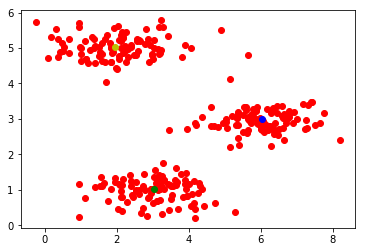

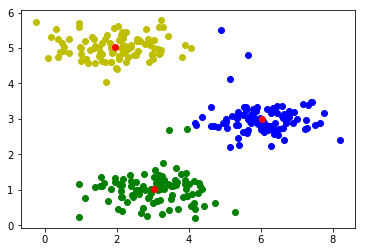

In [43]:
#main loop for training data
count = 0
while True:
#for i in range(0, 50):
  count += 1
  if np.array_equal(k_prev, k_present)==False:
    y_hat = get_y_hat(x,k_present)
    k_prev = copy.deepcopy(k_present)
    print('k_prev',k_prev)
    k_present = update_cent(k_present,x,y_hat)
    print('k_present',k_present)
    print('k_prev',k_prev)
  else :
    break
#  if np.array_equal(k_prev, k_present)==True:
 #   break
print(count)  
  #print('k_present',k_present)
 # print('k_prev',k_prev)
  #print(k_prev)
  
  

#print(k_present)
show_graph(x1,x2,k_present)
make_y_color(x1,x2,k_present,y_hat)



For test data

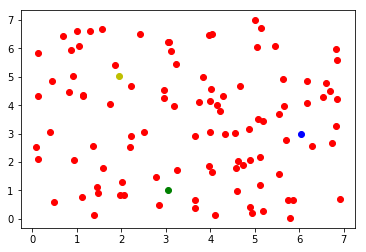

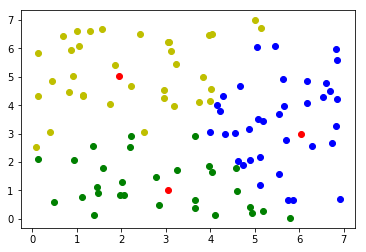

In [51]:
k_present
np.random.seed(0)
x_i_test = 7*np.random.rand(100,2)
x_i_test
y_hat_test = get_y_hat(x_i_test,k_present)
show_graph(x_i_test[:,0],x_i_test[:,1],k_present)
make_y_color(x_i_test[:,0],x_i_test[:,1],k_present,y_hat_test)

For excel data

In [0]:
name_file ='./grade_students.csv'

columns = ['x1','x2','t1','t2','t3','t4']
data_in = pd.read_csv(name_file, names=columns, sep=',')

#data_in.plot(kind='scatter',x='x1',y='x2',colors='red')

#preprocessing
x1_3 = np.asarray(data_in['x1'])[1:].astype(float)
x2_3 = np.asarray(data_in['x2'])[1:].astype(float)
t1 = np.asarray(data_in['t1'])[1:].astype(float)
t2 = np.asarray(data_in['t2'])[1:].astype(float)
t3 = np.asarray(data_in['t3'])[1:].astype(float)
t4 = np.asarray(data_in['t4'])[1:].astype(float)

#x1,x2,t1,t2,t3,t4 -> x1,x2,t
#t_3 = (t1+t2+t3+t4)/4
#x1,x2,t_3
#plt.plot(x1,x2,t_3,'ro')


Define funtions for test

In [0]:
def update_cent_3(k,x,y_hat):
  for j in range(0,len(k)):
    for n in range(0,len(x[0])):
      sum_n = 0
      count = 0
      for i in range(0,len(x)):
        if y_hat[i] == j:
          sum_n += x[i,n]
          count += 1       
      if count == 0 :
        k[j] = 500*np.random.rand(1,6)
      else :  
        k[j,n] = sum_n/count
  return k      

Initialize part

In [9]:
import copy

x_3 = np.hstack([x1_3.reshape(-1,1),x2_3.reshape(-1,1),t1.reshape(-1,1),t2.reshape(-1,1),t3.reshape(-1,1),t4.reshape(-1,1)])
np.random.seed(0)
k_3 = 700*np.random.rand(3,6)
print(k_3,x_3)
k_present_3 = copy.deepcopy(k_3)
k_prev_3 = np.zeros([len(k_3),len(k_3[0])])


[[384.16945275 500.63255646 421.93436325 381.4182281  296.55835954
  452.12587915]
 [306.31104788 624.24110055 674.56393235 268.40906318 554.20752666
  370.22644383]
 [397.63119277 647.9176468   49.72524074  60.99050979  14.15287821
  582.83389188]] [[  1.   9. 516. 578. 601. 493.]
 [  0.  12. 451. 507. 584. 436.]
 [  1.   4. 483. 526. 529. 486.]
 ...
 [  1.   3. 487. 515. 556. 506.]
 [  1.  10. 492. 479. 531. 481.]
 [  0.   7. 579. 578. 625. 536.]]


In [13]:
#main loop for training data
count_3 = 0
while True:
#for i in range(0, 50):
  count_3 += 1
  if np.array_equal(k_prev_3, k_present_3)==False:
    y_hat_3 = get_y_hat(x_3,k_present_3)
    k_prev_3 = copy.deepcopy(k_present_3)
    #print('k_prev_3',k_prev_3)
    k_present_3 = update_cent_3(k_present_3,x_3,y_hat_3)
    #print('k_present_3',k_present_3)
    #print('k_prev_3',k_prev_3)
  else :
    break
#  if np.array_equal(k_prev, k_present)==True:
 #   break
print(count_3)  
  #print('k_present',k_present)
 # print('k_prev',k_prev)
  #print(k_prev)
  
  

#print(k_present)
#show_graph(x1,x2,k_present)
#make_y_color(x1,x2,k_present,y_hat)



1732


각 그룹의 수렴된 centroid 를 찾은다음, 그 중심의 feature 들이 어떤 특성을 갖는지 관계 파악할 수 있음

In [41]:
test_mean = k_present_3[:,2:].sum(axis =1).reshape(-1,1)/4
test_mean
other_arr = k_present_3[:,:2]
last_arr = np.hstack([other_arr , test_mean])
last_arr
# 데이터를 분석한 결과, 평균성적이 가장낮은 그룹인 3번째그룹은 free lunch ,absent 할
# 확률이 가장 높았기 때문에 weak group 이라 할 수 있다
# 평균성적이 가장 높은 그룹인 2번째 그룹은 freelunch 를 가장 작게 신청하며 absent 할 
# 확률도 가장 작은것으로 확인되었다
# 마지막으로 그룹1은 평균정도의 성적을보이며 freelunch 와 absent 도 2와3그룹의 중간
# 정도를 나타냄을 알 수 있다


array([[4.71982759e-01, 6.92974138e+00, 5.36895690e+02],
       [2.52148997e-01, 6.60816619e+00, 5.87917980e+02],
       [7.26826609e-01, 8.66194111e+00, 4.88713877e+02]])

In [0]:
x = np.hstack([x1.reshape(-1,1),x2.reshape(-1,1)])

#initialize K = 3

np.random.seed(1)
k = np.random.randint(0,10,(3,2))
k

#make y_hat
init_array = np.zeros([len(x),len(k)])
y_hat = np.zeros([len(x),1])

for i in range(0,len(x)):
  for n in range(0,len(k)):
    l = np.linalg.norm(x[i]-k[n])**2
    init_array[i,n] = l
  y_hat[i] = np.argmin(init_array[i])

#print(init_array)

#y_hat = np.argmin(init_array[2])
#y_hat
y_hat

#updateing centroids
for j in range(0,len(k)):
  for n in range(0,len(x[0])):
    sum_n = 0
    count = 0
    for i in range(0,len(x)):
      if y_hat[i] == j:
        sum_n += x[i,n]
        count += 1        
    k[j,n] = sum_n/count
    #print(k)
    
plt.plot(x1,x2,'ro')
plt.plot(k[0,0],k[0,1],'bo')
plt.plot(k[1,0],k[1,1],'go')
plt.plot(k[2,0],k[2,1],'yo')
plt.show()
      
k            




In [0]:
a = np.array([1,2])
b = np.array([2,2])

a==b

#while True:
count = 0
for i in range(0, 50):
  count += 1
  if np.array_equal(k_prev, k_present)==True:
    y_hat = get_y_hat(x,k_present)
    k_prev = k_present
    print('k_prev',k_prev)
    k_present = update_cent(k_present,x,y_hat)
    print('k_present',k_present)
  else :
    break
#  if np.array_equal(k_prev, k_present)==True:
 #   break
print(count)  
  #print('k_present',k_present)
 # print('k_prev',k_prev)
  #print(k_prev)

k_prev [[9.63662761 3.83441519]
 [4.85445611 2.11629483]
 [1.92925575 4.29331133]]
k_present [[7.5513875  3.1285375 ]
 [4.5421413  1.97694598]
 [1.93655269 4.69763028]]
2
